In [ ]:
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import datasets
from sklearn.tree import export_graphviz
from six import StringIO

from IPython.display import Image
import pydotplus
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:

%%time
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
import random
import numpy as np
n=20
x = list(range(0,n,1))
y = [0]*int(n/2) + [1]*int(n/2)
random.shuffle(y)
decision_tree  = DecisionTreeClassifier()
decision_tree = decision_tree.fit(np.reshape(x,(-1, 1)), y)
#decision_tree = decision_tree.fit(x, y)
print(export_text(decision_tree, feature_names=['Posição']))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
|--- Posição <= 5.50
|   |--- Posição <= 1.50
|   |   |--- Posição <= 0.50
|   |   |   |--- class: 0
|   |   |--- Posição >  0.50
|   |   |   |--- class: 1
|   |--- Posição >  1.50
|   |   |--- class: 0
|--- Posição >  5.50
|   |--- Posição <= 16.50
|   |   |--- Posição <= 10.50
|   |   |   |--- Posição <= 8.50
|   |   |   |   |--- class: 1
|   |   |   |--- Posição >  8.50
|   |   |   |   |--- class: 0
|   |   |--- Posição >  10.50
|   |   |   |--- class: 1
|   |--- Posição >  16.50
|   |   |--- class: 0

CPU times: user 4.07 ms, sys: 11 µs, total: 4.08 ms
Wall time: 12.6 ms


In [ ]:
decision_tree.predict(np.reshape(2,(-1, 1)))

array([1])

In [ ]:
dot_data = StringIO()
export_graphviz(decision_tree, out_file=dot_data,
                feature_names=['Posição'],  
                class_names=['Azul','Amarelo'],  
                filled=True, rounded=True,  
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
display(Image(graph.create_png()))

In [ ]:
#configs
split_method = 'gini'
splitter_strategy = 'best'
min_samples_split = 2
random_state = 1
min_impurity_split = 1e-7
alpha_pruning = 0
depth_range = range(1,11,1)
test_size = .2

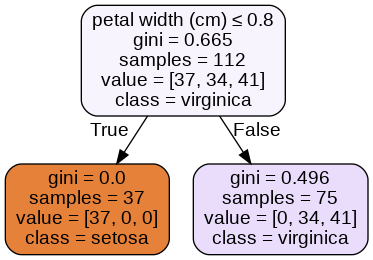

acc: 0.58


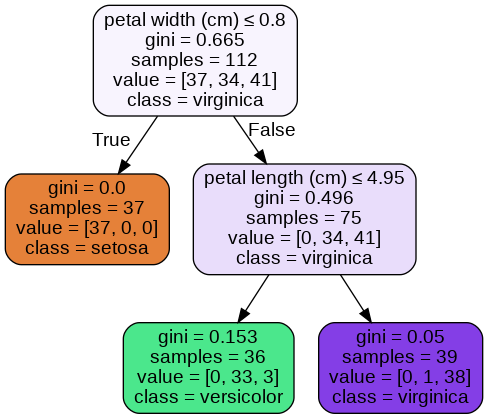

acc: 0.89


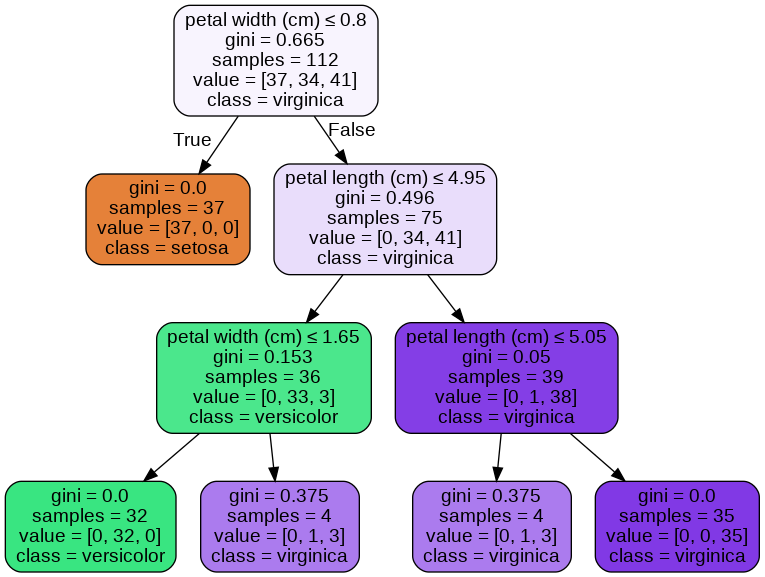

acc: 0.97


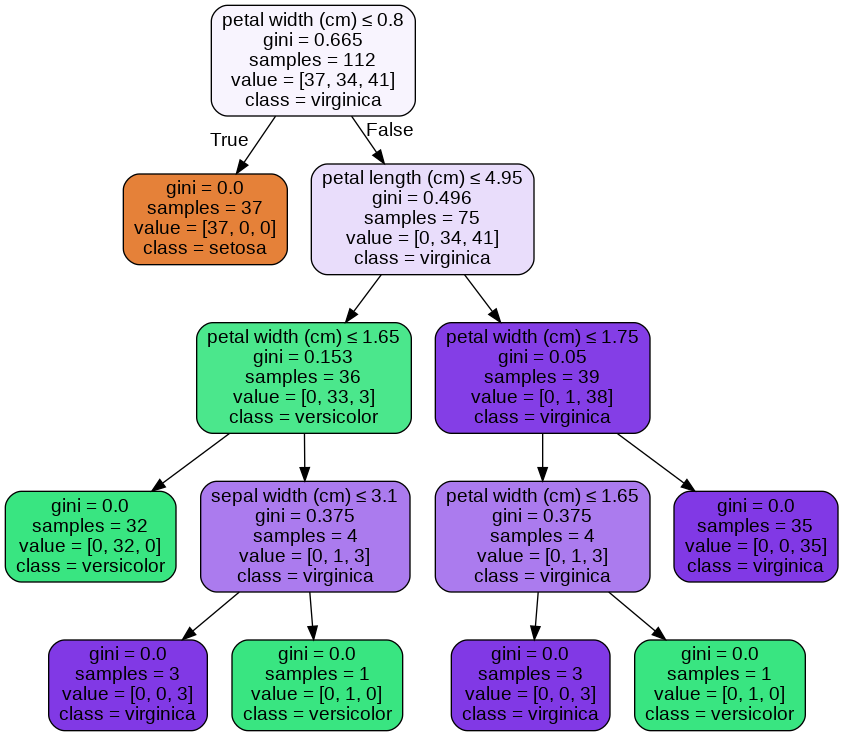

acc: 0.97


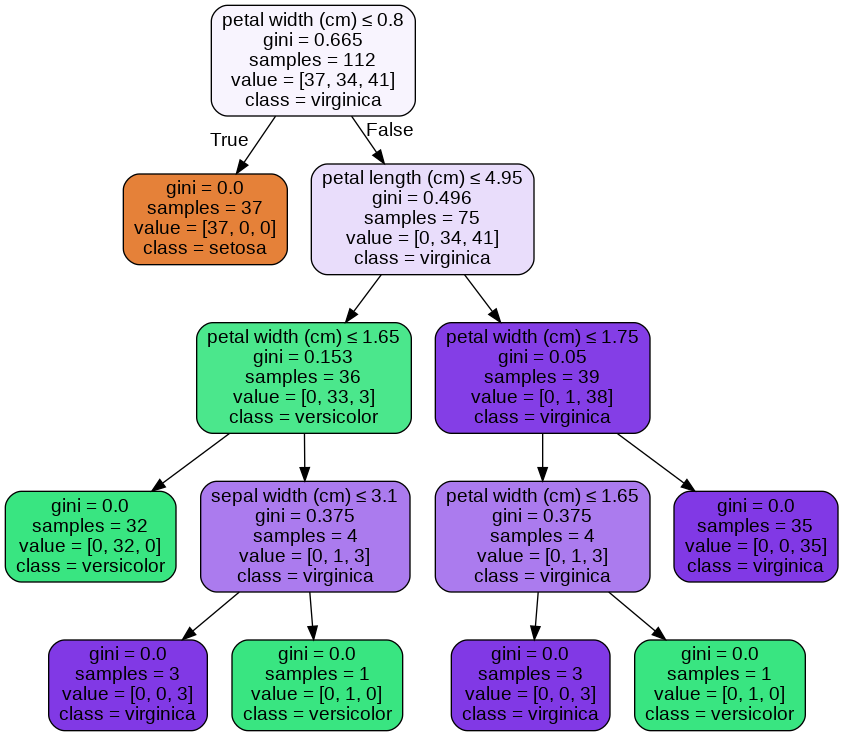

acc: 0.97
CPU times: user 548 ms, sys: 46.8 ms, total: 595 ms
Wall time: 845 ms


In [ ]:
%%time
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
y = iris.target
test_size=0.2
X_train, X_test, y_train, y_test = train_test_split(df.values, y, random_state=0)
for i in range(1,6,1):
    tree = DecisionTreeClassifier(criterion=split_method,splitter=splitter_strategy,max_depth=i,random_state=random_state
                                  ,min_impurity_decrease=min_impurity_split,ccp_alpha=alpha_pruning)
    tree.fit(X_train, y_train)
    dot_data = StringIO()
    export_graphviz(tree, out_file=dot_data,  
                    feature_names=iris.feature_names,  
                    class_names=iris.target_names,
                    filled=True, rounded=True,                    
                    special_characters=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    display(Image(graph.create_png()))
    print('acc: {:.2}'.format(accuracy_score(y_test, tree.predict(X_test))))

In [ ]:
%%time
iris = datasets.load_iris()
input_columns = iris.feature_names
target_columns = ['target']
test_size=0.2
df = pd.DataFrame(np.column_stack((iris.data,iris.target)), columns = input_columns+target_columns)
X_train, X_test, y_train, y_test = train_test_split(df[input_columns].values, df[target_columns], test_size=test_size, 
                                                    random_state=1)
iris_tree = DecisionTreeClassifier()
iris_tree = iris_tree.fit(X_train, y_train)
dot_data = StringIO()

export_graphviz(iris_tree, out_file=dot_data,
                feature_names=input_columns,  
                class_names=iris.target_names,  
                filled=True, rounded=True,  
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
display(Image(graph.create_png()))
print('acc: {:.2}'.format(accuracy_score(y_test, iris_tree.predict(X_test))))

In [ ]:
accuracy_iris_tree_list = []

iris = datasets.load_iris()
input_columns = iris.feature_names
target_columns = ['target']
df = pd.DataFrame(np.column_stack((iris.data,iris.target)), columns = input_columns+target_columns)
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(df[input_columns].values, df[target_columns], test_size=test_size, 
                                                    random_state=0)
# busca por profundidade
for depth in depth_range:
    iris_tree = DecisionTreeClassifier(criterion=split_method,splitter=splitter_strategy,max_depth=depth,random_state=random_state
                                  ,min_impurity_decrease=min_impurity_split,ccp_alpha=alpha_pruning)
    iris_tree = iris_tree.fit(X_train, y_train)
    dot_data = StringIO()
    tree_valid_acc = cross_val_score(iris_tree,df[input_columns],df[target_columns],cv=10)
    accuracy_iris_tree_list.append(tree_valid_acc)
    export_graphviz(iris_tree, out_file=dot_data,
                    feature_names=iris.feature_names,  
                    class_names=iris.target_names,  
                    filled=True, rounded=True,  
                    special_characters=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    display(Image(graph.create_png()))
    print("Accuracy: %0.2f (+/- %0.2f)" % (tree_valid_acc.mean(), tree_valid_acc.std() * 2))

## Wine


In [ ]:
from sklearn.datasets import load_wine
import scikitplot as skplt
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

accuracy_wine_tree_list = []
test_size = 0.2
wine = datasets.load_wine()
input_columns = wine.feature_names
target_columns = ['target']
df = pd.DataFrame(np.column_stack((wine.data,wine.target)), columns = input_columns+target_columns)
y = wine.target
df = df.drop(columns=['flavanoids'])
print(df.columns.tolist())
input_columns = df.drop(target_columns,axis=1).columns
X_train, X_test, y_train, y_test = train_test_split(df[input_columns].values, df[target_columns], test_size=test_size, 
                                                    random_state=0)

# busca por profundidade
for depth in depth_range:
    wine_tree = DecisionTreeClassifier(criterion=split_method,splitter=splitter_strategy,max_depth=depth,random_state=random_state
                                  ,min_impurity_decrease=min_impurity_split,ccp_alpha=alpha_pruning)
    wine_tree = wine_tree.fit(X_train, y_train)
    dot_data = StringIO()
    tree_valid_acc = cross_val_score(wine_tree,df[input_columns],df[target_columns],cv=10)
    accuracy_wine_tree_list.append(tree_valid_acc)
    export_graphviz(wine_tree, out_file=dot_data,
                    feature_names=input_columns,  
                    class_names=wine.target_names,  
                    filled=True, rounded=True,  
                    special_characters=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    display(Image(graph.create_png()))
    print("Accuracy: %0.2f (+/- %0.2f)" % (tree_valid_acc.mean(), tree_valid_acc.std() * 2))

# Titanic

In [ ]:
pip install seaborn


In [ ]:
import seaborn
titanic = seaborn.load_dataset('titanic')

In [ ]:
fare = pd.DataFrame((titanic['fare'] - titanic['fare'].mean())/titanic['fare'].std())
print(fare.mean())
print(fare.std())

fare    7.437622e-16
dtype: float64
fare    1.0
dtype: float64


In [ ]:
fare = pd.DataFrame((titanic['fare']-titanic['fare'].mean())/titanic['fare'].std())
print(fare.mean())
print(fare.std())

fare    7.437622e-16
dtype: float64
fare    1.0
dtype: float64


(array([337., 182., 147.,  50.,  16.,  39.,  18.,  29.,  18.,   2.,   8.,
          7.,   0.,   7.,   9.,   0.,   2.,   0.,   0.,   0.,   4.,   1.,
          4.,   0.,   2.,   6.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   3.]),
 array([-0.64805768, -0.44186172, -0.23566577, -0.02946981,  0.17672614,
         0.3829221 ,  0.58911806,  0.79531401,  1.00150997,  1.20770592,
         1.41390188,  1.62009783,  1.82629379,  2.03248975,  2.2386857 ,
         2.44488166,  2.65107761,  2.85727357,  3.06346952,  3.26966548,
         3.47586143,  3.68205739,  3.88825335,  4.0944493 ,  4.30064526,
         4.50684121,  4.71303717,  4.91923312,  5.12542908,  5.33162504,
         5.53782099,  5.74401695,  5.9502129 ,  6.15640886,  6.36260481,
         6.56880077,  6.77499673,  6.98119268,  7.18738864,  7.39358459,
         7.59978055,  7.8059765 ,  8.01217246,  8.21836842,  8.42456437,
 

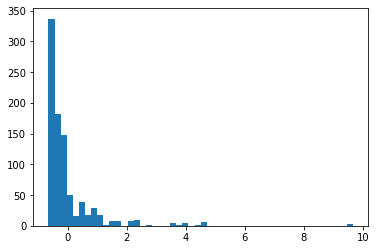

In [ ]:
plt.hist((titanic['fare'] - titanic['fare'].mean())/titanic['fare'].std(),bins=50)

#Redes Neurais

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
np.random.seed(1337) # for reproducibility
import keras
import sklearn
import pandas_profiling
import json
#import pymongo
#import dns
from datetime import datetime


from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Model
from keras.layers import Input, Dense
from keras.models import Sequential
from keras.layers import Dense, Activation
from sklearn.decomposition import PCA

%matplotlib inline


data = sklearn.datasets.load_wine()
print(data.DESCR)

wineDf = pd.DataFrame(data = data.data
             , columns =  data.feature_names)

def normalizeData(x):
    return (x - np.mean(x))/np.std(x)



def load_wine_nn_model():
    
    model = Sequential()
    model.add(Dense(13,input_shape=(13,),activation='relu'))
    #model.add(Dense(10,activation='relu'))
    model.add(Dense(3,activation='softmax'))
    # defining optimizer
    sgd = keras.optimizers.SGD(lr=3e-2, momentum=.7, decay=1e-9, nesterov=False)

    # defining compiling model
    model.compile(loss='categorical_crossentropy', optimizer=sgd,metrics=['accuracy'])
    
    return model



#Class Distribution in the dataset using pie chart
def dist_class_plot(names, data, title):
    fig1, ax1 = plt.subplots(1, 2, figsize=(10, 6), dpi= 80, facecolor='w', edgecolor='k')
    ax1[0].pie(data, labels=names, autopct='%1.1f%%',
            shadow=True, startangle=90, textprops=dict(color="k",size = "xx-large"))
    ax1[0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    ax1[1].bar(names, data)
    fig1.suptitle(title,fontsize=18)
    plt.subplots_adjust(wspace=0.4)
    return





# plot history
#plt.plot([x*100 for x in model_history.history['acc']])
#plt.plot([x*100 for x in model_history.history['val_acc']])
#plt.title('Model Hot One loss')
#plt.xlabel('epoch')
#plt.ylabel('loss')
#plt.ylim(top=105)
#plt.legend(['train','validation'],bbox_to_anchor=(1.0, 1.),loc='best',borderaxespad=0.)
#plt.show()

#invadindo


.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [ ]:
scaler = StandardScaler()
scaler.fit(wineDf)
scalerWineDf = pd.DataFrame(scaler.transform(wineDf.values),index=wineDf.index,columns=wineDf.columns)

wineDf = normalizeData(wineDf)

#wineDf.iloc[:,:]=sklearn.preprocessing.Normalizer('l1').fit_transform(wineDf)
wineDf.head(5)
wineDf_target = pd.DataFrame(data = keras.utils.to_categorical(data.target)
             , columns =  data.target_names)
wineDf_target.head(5)
wineDf_target = wineDf_target.replace(0,-1)


In [ ]:
#setup early_stop
early_stop = keras.callbacks.EarlyStopping(monitor='val_acc', patience=10, min_delta=0.5,mode='max', restore_best_weights=True)
history_stop = keras.callbacks.History()
weights_file = './weights/weights-improvement-{epoch:02d}-{val_accuracy:.2f}.hdf5'
#file_path = 'iris_nn_model.hdf5'
checkpoint = keras.callbacks.ModelCheckpoint(weights_file, monitor='val_loss', save_best_only=True, verbose=1)
callbacks = [early_stop, history_stop]


In [ ]:
#Class Distribution in the dataset
for name in wineDf_target.columns.tolist():
    print('{0} = {1} ({2:2.2f}%)'.format(name,wineDf_target[wineDf_target[name]==1].shape[0],(wineDf_target[wineDf_target[name]==1].shape[0]/wineDf_target.shape[0])*100))
print('\n')


class_0 = 59 (33.15%)
class_1 = 71 (39.89%)
class_2 = 48 (26.97%)




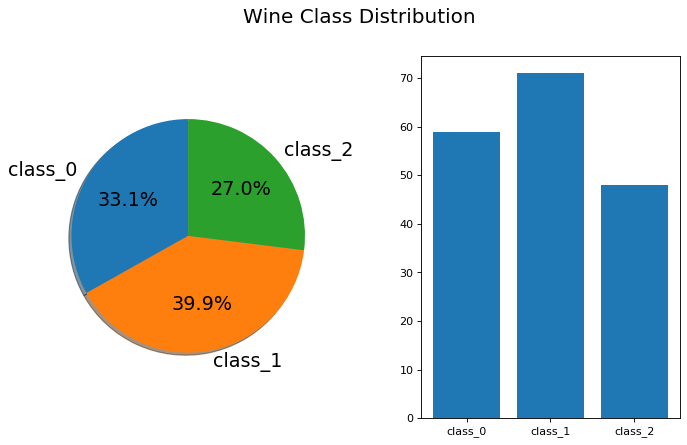

In [ ]:
dist_class_plot(names=wineDf_target.columns.tolist(),
               data=[wineDf_target[wineDf_target[name]==1].shape[0] for name in wineDf_target.columns.tolist()],
               title="Wine Class Distribution")


Train:class_0 = 45 (31.69%)
Train:class_1 = 55 (38.73%)
Train:class_2 = 42 (29.58%)


Test:class_0 = 14 (38.89%)
Test:class_1 = 16 (44.44%)
Test:class_2 = 6 (16.67%)
Train on 142 samples, validate on 36 samples
Epoch 1/1000
142/142 [==============================] - 1s 10ms/step - loss: -1.8454 - acc: 0.2958 - val_loss: -3.4360 - val_acc: 0.4167
Epoch 2/1000
142/142 [==============================] - 0s 87us/step - loss: -5.1516 - acc: 0.7042 - val_loss: -9.9871 - val_acc: 1.0000
Epoch 3/1000
142/142 [==============================] - 0s 79us/step - loss: -15.0591 - acc: 0.9366 - val_loss: -23.7221 - val_acc: 0.9722
Epoch 4/1000
142/142 [==============================] - 0s 82us/step - loss: -27.3901 - acc: 0.9577 - val_loss: -30.1689 - val_acc: 0.9722
Epoch 5/1000
142/142 [==============================] - 0s 77us/step - loss: -30.4213 - acc: 0.9718 - val_loss: -31.1692 - val_acc: 0.9722
Epoch 6/1000
142/142 [==============================] - 0s 81us/step - loss: -30.9370 - acc: 0.971

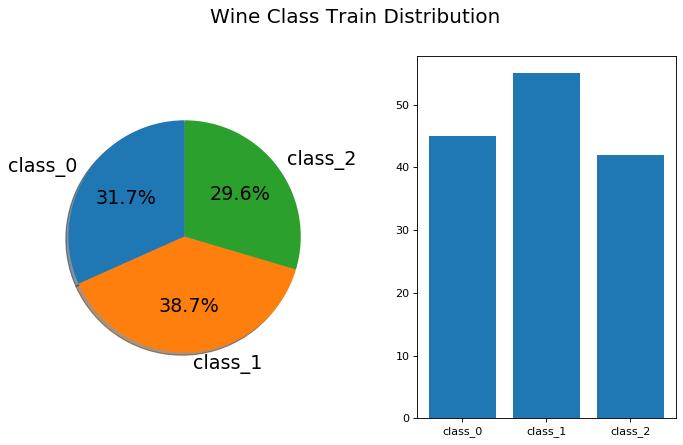

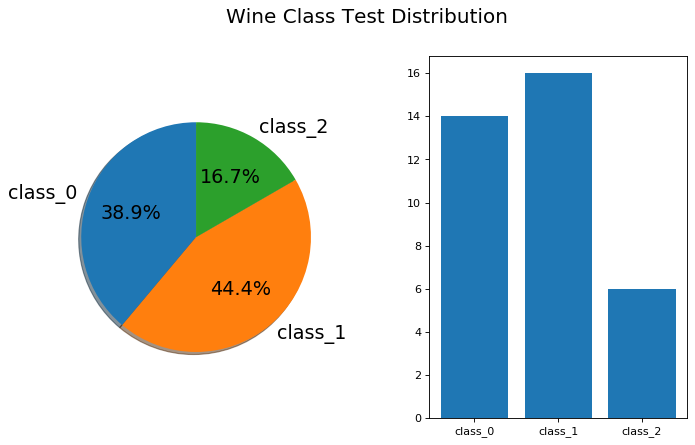

In [ ]:
#TrainSplit data
x_train,x_test,y_train,y_test=sklearn.model_selection.train_test_split(wineDf,wineDf_target,test_size=0.2, random_state=0)

for name in wineDf_target.columns.tolist():
    print('Train:{0} = {1} ({2:2.2f}%)'.format(name,y_train[y_train[name]==1].shape[0],(y_train[y_train[name]==1].shape[0]/y_train.shape[0])*100))
print('\n')

dist_class_plot(names=wineDf_target.columns.tolist(),
                data=[y_train[y_train[name]==1].shape[0] for name in wineDf_target.columns.tolist()],
               title="Wine Class Train Distribution")

for name in wineDf_target.columns.tolist():
    print('Test:{0} = {1} ({2:2.2f}%)'.format(name,y_test[y_test[name]==1].shape[0],(y_test[y_test[name]==1].shape[0]/y_test.shape[0])*100))

dist_class_plot(names=wineDf_target.columns.tolist(),
                data=[y_test[y_test[name]==1].shape[0] for name in wineDf_target.columns.tolist()],
               title="Wine Class Test Distribution")


model = load_wine_nn_model()
model_history = model.fit(x_train, y_train, epochs=1000, batch_size=30, validation_data = (x_test,y_test),                       
                       verbose=1,callbacks=callbacks,shuffle=False)


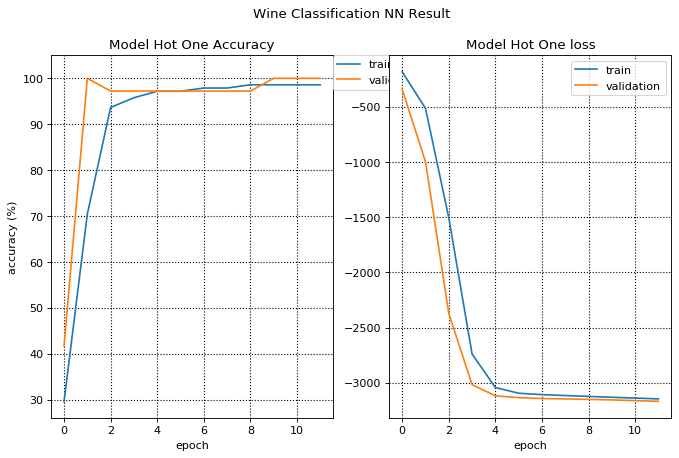

In [ ]:
#plot
fig2, ax2 = plt.subplots(1, 2, figsize=(10, 6), dpi= 80, facecolor='w', edgecolor='k', sharex=True)
fig2.suptitle('Wine Classification NN Result') # or plt.suptitle('Main title')
ax2[0].plot([x*100 for x in model_history.history['acc']])
ax2[0].plot([x*100 for x in model_history.history['val_acc']])
ax2[0].title.set_text('Model Hot One Accuracy')
ax2[0].set_xlabel('epoch')
ax2[0].set_ylabel('accuracy (%)')
ax2[0].set_ylim(top=105)
ax2[0].legend(['train','validation'],bbox_to_anchor=(1.0, 1.),loc='best',borderaxespad=0.)
ax2[0].grid(color='k', linestyle=':', linewidth=1)

ax2[1].plot([x*100 for x in model_history.history['loss']])
ax2[1].plot([x*100 for x in model_history.history['val_loss']])
ax2[1].title.set_text('Model Hot One loss')
ax2[1].set_xlabel('epoch')
ax2[1].legend(['train','validation'],bbox_to_anchor=(1.0, 1.0),loc='best', fancybox=True)
ax2[1].grid(color='k', linestyle=':', linewidth=1)


In [ ]:

test_loss, test_acc = model.evaluate(x_test, y_test)

print('Validation accuracy: {:.2f}%'.format(test_acc*100))

all_loss, all_acc = model.evaluate(np.vstack((x_train,x_test)), np.vstack((y_train,y_test)))

print('Test accuracy: {:.2f}%'.format(all_acc*100))


36/36 [==============================] - 0s 118us/step
Validation accuracy: 100.00%
178/178 [==============================] - 0s 41us/step
Test accuracy: 92.70%
